# Aufgabenblatt 8

<p style="border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    In dieser Übung beschäftigen wir uns mit weiteren charackteristischen Grössen von stochastischen Signalen.
</p>

<p style="border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente der Funktion darlegt und ihre Funktionalität beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.arange.html">numpy.arange(...)</a> Gibt ein Array zurück mit gleichmässig verteilten Werten zwischen start und stop mit der Schrittweite step.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.where.html">numpy.where(...)</a> Diese Funktion gibt alle Indices eines Arrays zurück, welche eine definierte Bedingung erfüllen.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">numpy.histogram(...)</a> Berechnet das Histogram der übergebenen Daten. Dabei hält es sich an die übergebenen Ränder der Buckets.<br>
    <b>Funktionen zum Plotten: </b><br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html"> axis.axvline(...)</a> Fügt eine vertikale Linie dem Plot hinzu.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html"> axis.axhline(...)</a> Fügt eine horizontale Linie dem Plot hinzu.<br>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1 Wahrscheinlichkeitsmassenfunktion

Wie Sie aus der Vorlesung kennen, gibt die Wahrscheinlichkeitsmassenfunktion  (probability mass function, kurz PMF) die Wahrscheinlichkeit an, mit der ein bestimmter Wert z.B. in einem Datensatz vorkommt. Sie ist für diskrete Wahrscheinlichkeitsverteilungen das Analogon zur Wahrscheinlichkeitsdichtefunktion.

### a)

Schreiben Sie eine Funktion, die die Wahrscheinlichkeitsmassenfunktion für einen Datensatz berechnet. Die Diskretisierung der Daten wird durch Auflösung der Messung oder allfälliges späteres Binning gegeben sein. Die Funktion sollte also die Daten sowie die Auflösung der Daten als Argument nehmen und die möglichen Werte mit den dazugehörigen Wahrscheinlichkeiten zurückgeben.

Sie können dazu die `np.histogram` Funktion benutzen, beachten Sie dabei, dass Sie die Bins richtig definieren. Falls `bins = [1, 2, 3]` dann ist das erste Bin durch die Grenzen `[1, 2)` und das zweite durch `[2, 3]` gegeben.


In [83]:
def my_pmf(data, resolution):
    bins = np.arange(np.min(data), np.max(data), resolution)
    hist = np.histogram(data, bins=bins)[0]
    return bins[:-1], hist/len(data)

### b)

Im File `Voltages.txt` finden Sie zwei Datensätze mit Spannungen mit einer Auflösung von 10mV als Funktion der Zeit. Laden Sie die Datensätze, berechnen Sie jeweils die PMF und stellen Sie sie graphisch dar. Überprüfen Sie dabei Ihre Funktion, indem Sie die Summe über alle Wahrscheinlichkeiten berechnen. Welchen Wert sollten Sie erhalten?

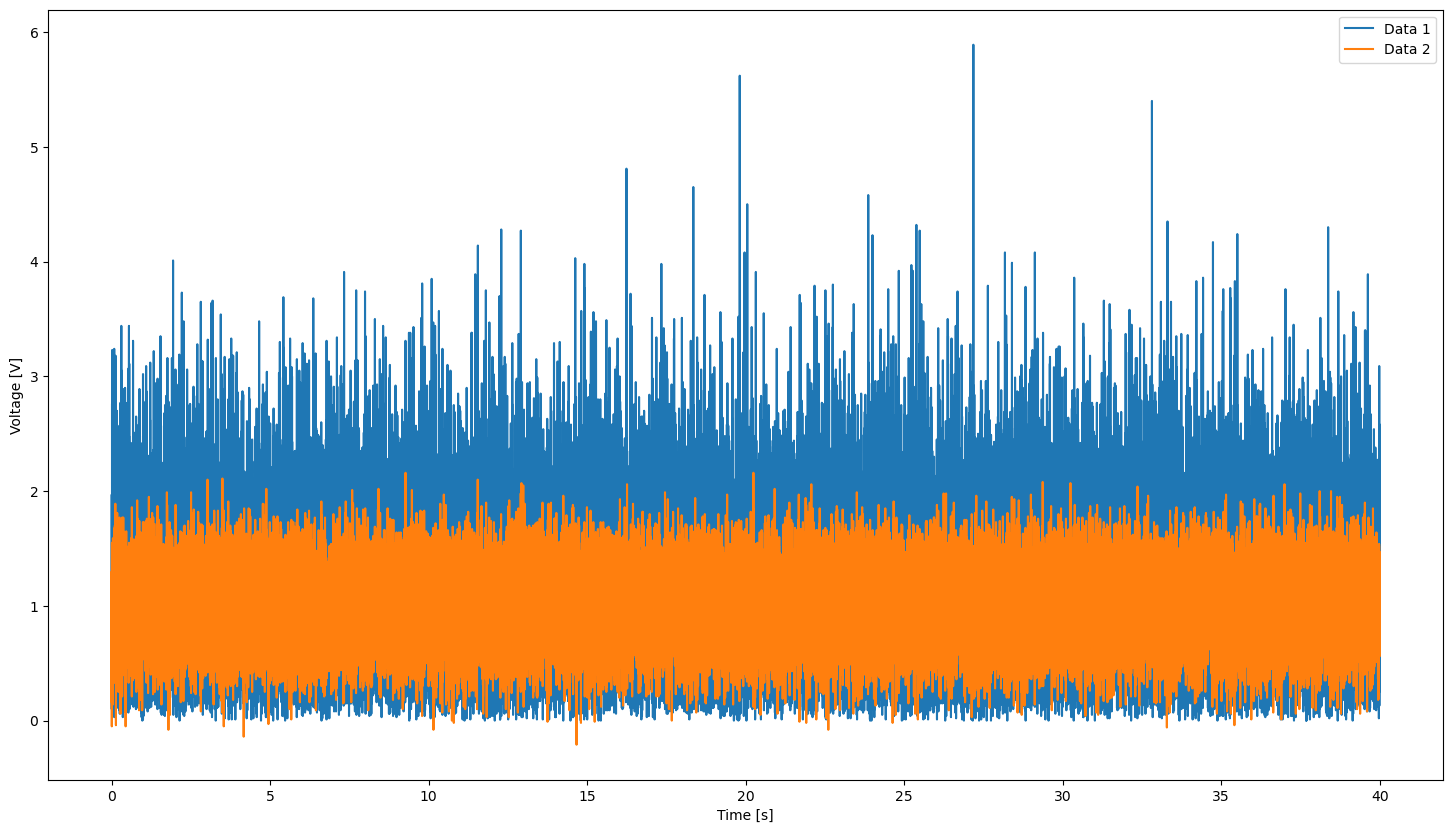

In [81]:
data1 = np.loadtxt('Voltages.txt', comments='#', delimiter=' ')
t = data1[0]
U1 = data1[1]
U2 = data1[2]
res = 0.01

_, ax  = plt.subplots(figsize=(18,10))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.plot(t, U2, label='Data 1')
ax.plot(t, U1, label='Data 2')
ax.legend()

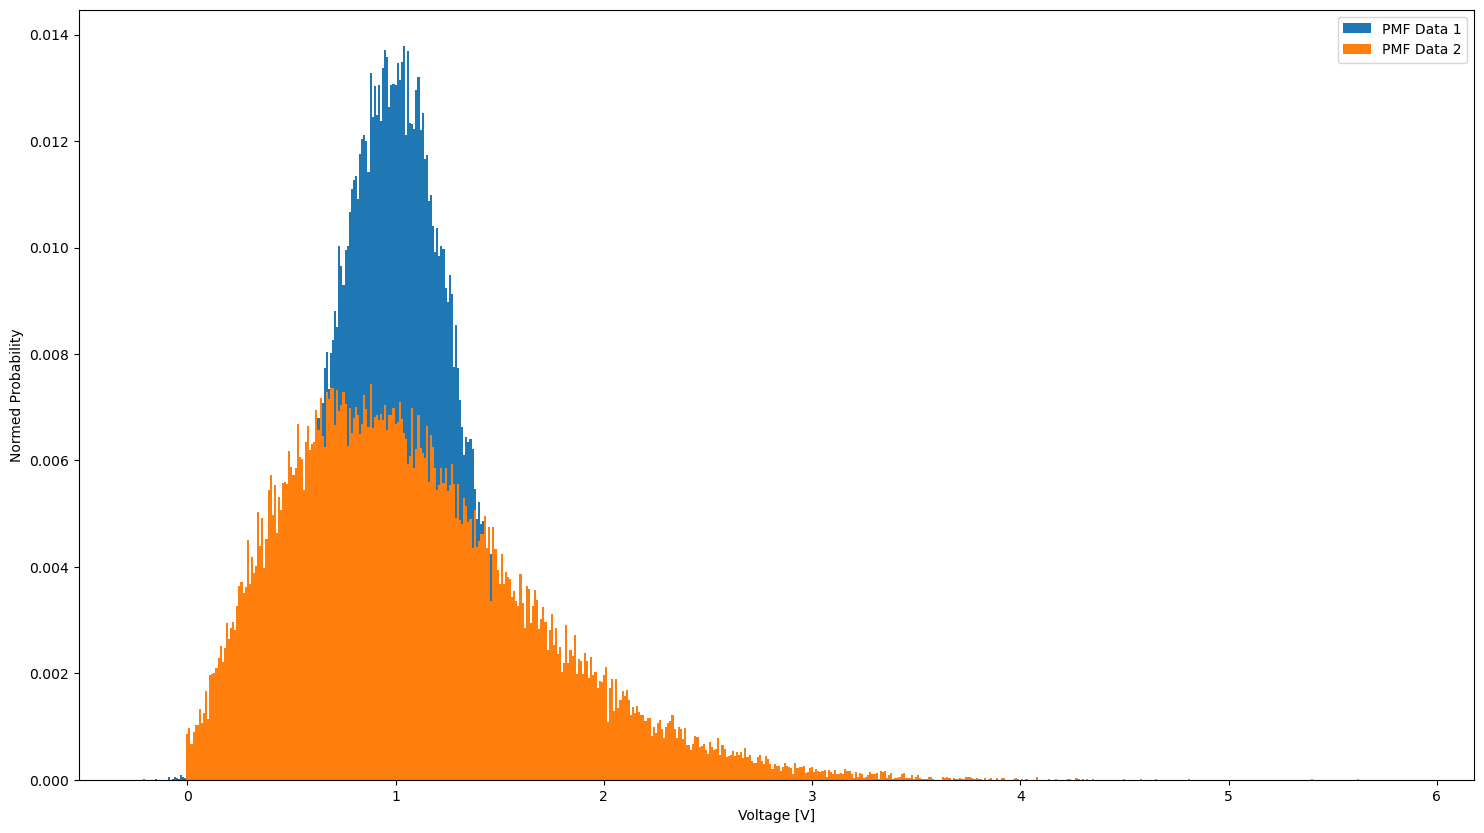

In [84]:
pmf1 = my_pmf(U1, res)
pmf2 = my_pmf(U2, res)

_, ax  = plt.subplots(figsize=(18,10))
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Normed Probability')
ax.bar(pmf1[0], pmf1[1], width=res, label='PMF Data 1')
ax.bar(pmf2[0], pmf2[1], width=res, label='PMF Data 2')
ax.legend()

In [79]:
print(f'The sum of all probabilities is {np.sum(pmf1[1])} and {np.sum(pmf2[1])}')

The sum of all probabilities is 0.9999600000000001 and 0.9999800000000001


### c)

Sie haben in der Vorlesung die Begriffe Mode, Median und Mittelwert kennengelernt. Schreiben Sie eine Funktion, die ein Set an Daten und deren Auflösung als Argument nimmt und die Mode und den Median der Daten zurückgibt. Sie können dazu die Hilfe von Numpy Funktionen verwenden.

In [89]:
def my_mode_median(data, resolution):
    pmf = my_pmf(data, resolution)
    return pmf[0][np.argmax(pmf[1])], np.median(data)

### d)

Plotten Sie nun die Mode, den Median und den Mittelwert der Datensätze in die PMF. Was für Unterschiede werden deutlich?

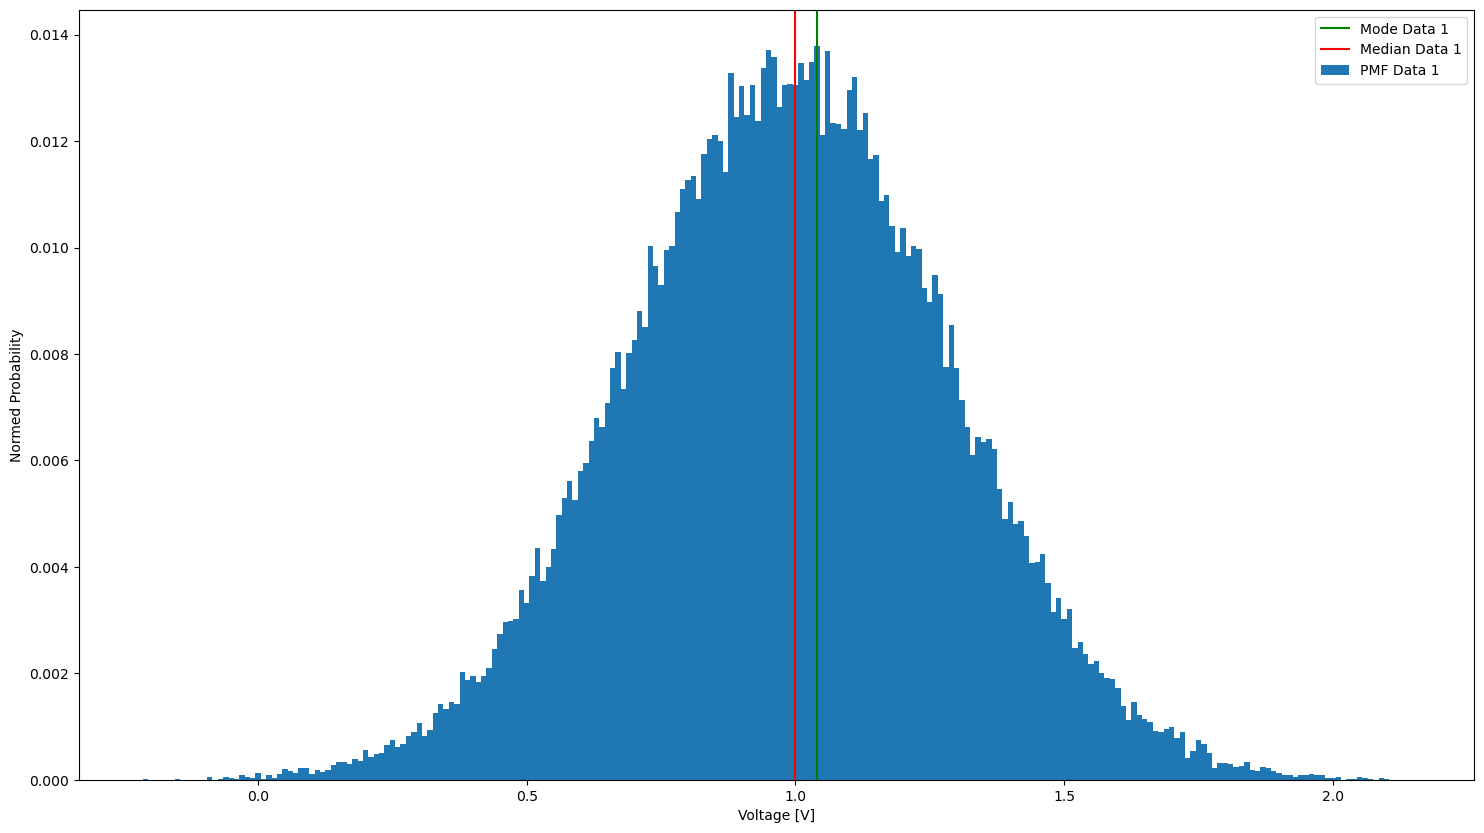

In [90]:
_, ax = plt.subplots(figsize=(18,10))
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Normed Probability')
ax.bar(pmf1[0], pmf1[1], width=res, label='PMF Data 1')
ax.axvline(my_mode_median(U1, res)[0], color='green', label='Mode Data 1')
ax.axvline(my_mode_median(U1, res)[1], color='red', label='Median Data 1')
ax.legend()

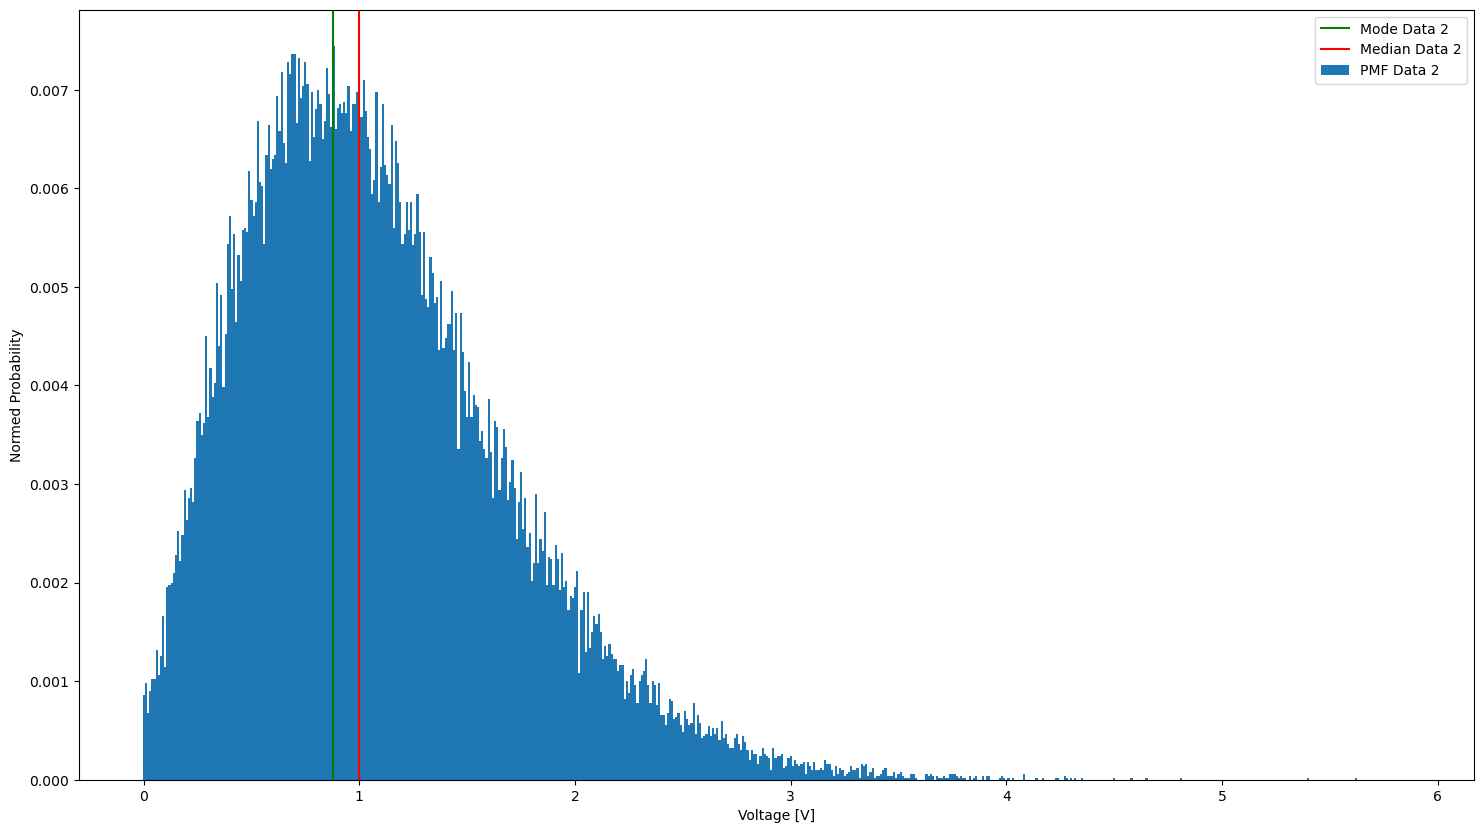

In [91]:
_, ax = plt.subplots(figsize=(18, 10))
ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Normed Probability')
ax.bar(pmf2[0], pmf2[1], width=res, label='PMF Data 2')
ax.axvline(my_mode_median(U2, res)[0], color='green', label='Mode Data 2')
ax.axvline(my_mode_median(U2, res)[1], color='red', label='Median Data 2')
ax.legend()

### e)

Eine wichtige Kenngrösse einer Verteilung ist deren Breite und eine häufig verwendete Definition dafür ist die Breite auf halber Höhe (full width at half maximum oder kurz FWHM). Schreiben Sie eine Funktion, die die FWHM für eine Verteilung berechnet, die ein einzelnes Maximum aufweist. Für Datensätze mit starkem Rauschen kann das Finden des halben Wertes komplizierter werden. Sie haben bereits Methoden gesehen, wie man Daten glätten kann, nehmen Sie also für diese Aufgabe an, dass das Rauschen der Daten kleiner ist als deren Auflösung.

In [128]:
def my_fwhm(data, resolution):
    bins, hist = my_pmf(data, resolution)
    mode, median = my_mode_median(data, resolution)
    hm = hist[np.argwhere(bins == mode)[0]]/2
    indices = np.argwhere(hist >= hm)
    return bins[indices[-1]] - bins[indices[0]]

### f)

Berechnen Sie die FWHM der PMF der Daten aus den beiden Datensätzen. Für normalverteilte Daten kann die FWHM auch analytisch berechnet werden. Dabei gilt dass: $\mathrm{FWHM} = 2\sigma\sqrt{2\log{2}}$, wobei $\sigma$ die Wurzel der Varianz ist. Vergleichen Sie das Resultat Ihrer Funktion mit der FWHM, die Sie aus der Varianz berechnen, können Sie die Abweichungen erklären? (Der symmetrische Datensatz ist Normalverteilt.)

In [130]:
print(f'The full width at half maximum of data 1 is {my_fwhm(U1, res)} or {2*np.sqrt(2*np.log(2)) * np.std(U1)}.')
print(f'The full width at half maximum of data 2 is {my_fwhm(U2, res)} or {2*np.sqrt(2*np.log(2)) * np.std(U2)}.')

The full width at half maximum of data 1 is [0.66] or 0.7059766269508349.
The full width at half maximum of data 2 is [1.34] or 1.4401798495981835.


#  Aufgabe 2 Momente

Momente sind charakteristische Grössen für Zufallsvariablen und sind verknüpft mit Erwartungswert, Varianz, Schiefe etc. In der Vorlesung haben Sie die Formel für das $n$-te Moment von diskrete Zufallsvariablen gesehen:

$$m_n = \sum_{i=0}^{N}x^n_ip_i(x),$$

wobei der Wert $x_i$ mit Wahrscheinlichkeit $p_i(x)$ im Datensatz vorkommt. Da $x_ip_i(x) = \frac{X_i}{M}$, wobei $X_i$ den Daten und $M$ deren Anzahl entspricht, kann man das $n$-te Moment auch via:

$$ m_n =\frac{1}{M}\sum_{i=0}^{M}X_i^n $$
berechnen. Dies hat den Vorteil das man nicht auf ein Binning angewiesen ist.

### a)

Schreiben Sie eine Funktion, die das n-te Moment aus einem Datensatz berechnet.

In [131]:
def my_moment(data, n):
    sum = 0
    for i in range(len(data)):
        sum += data[i]**n
    return sum/len(data)

### b)

Die ersten beiden Momente hängen mit dem Mittelwert und der Varianz zusammen. Berechnen Sie sie für die beiden Datensätze Mittelwert und Varianz einmal über die Momente und einmal mit Numpy und vergleichen Sie die Werte.

In [135]:
for i in range(4):
    print(f'The {i}-th moment of data 1 is {my_moment(U1, i)}.')
print(f'The mean of data 1 is {np.mean(U1)}.')
print(f'The variance of data 1 is {np.var(U1)}.')

The 0-th moment of data 1 is 1.0.
The 1-th moment of data 1 is 0.9975183999999983.
The 2-th moment of data 1 is 1.0849234000000993.
The 3-th moment of data 1 is 1.2616501156000695.
The mean of data 1 is 0.9975183999999999.
The variance of data 1 is 0.08988044166144002.


### c)

Die höheren Momente geben zusätzliche Informationen über die Symmetrie und die Breite der Verteilung. Berechnen und vergleichen Sie die ersten drei zentralen Momente für die beiden Datensätze.

In [138]:
for i in range(1, 4):
    print(f'The {i}-th moment of data 1 is {my_moment(U1, i)}.')
print('')
for i in range(1, 4):
    print(f'The {i}-th moment of data 2 is {my_moment(U2, i)}.')

The 1-th moment of data 1 is 0.9975183999999983.
The 2-th moment of data 1 is 1.0849234000000993.
The 3-th moment of data 1 is 1.2616501156000695.

The 1-th moment of data 2 is 1.083861999999989.
The 2-th moment of data 2 is 1.5487968040000066.
The 3-th moment of data 2 is 2.6917706692000887.
